In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [26]:
df = sns.load_dataset('titanic')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
# declare a new dataset that includes only people who survived
survived = df[df['survived'] == 1]

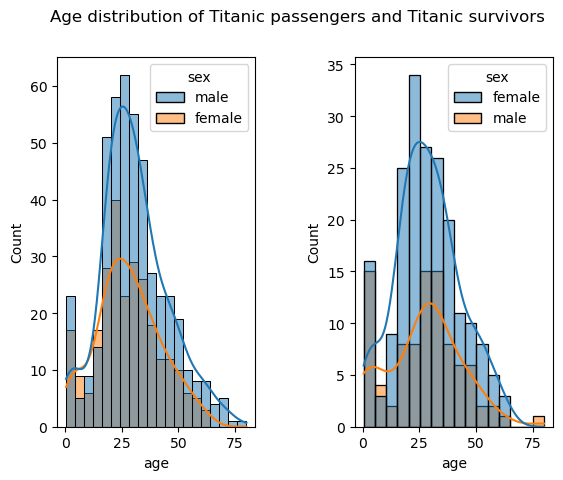

In [70]:
fig, ax = plt.subplots(nrows=1,ncols=2)
sns.histplot(data=df,x='age',ax=ax[0],kde=True,hue='sex')
sns.histplot(data=survived, x='age',ax=ax[1],kde=True,hue='sex')

fig.suptitle('Age distribution of Titanic passengers and Titanic survivors')
fig.subplots_adjust(wspace=0.5)
plt.show()

In [41]:
df['age'].mean()

29.69911764705882

In [42]:
survived['age'].mean()

28.343689655172415

In [47]:
round(100 * len(df[df['sex'] == 'female']) / len(df),2)

35.24

In [58]:
# It seems that the ratio of female survived was a nearly double than the ratio of women on board (35 vs 68 %)
round(100 * len(survived[survived['sex'] == 'female']) / len(survived),2)

68.13

In [113]:
def change_title(survived):
    if survived == 0:
        return 'No'
    else: 
        return 'Yes'

In [122]:
df['survived_text'] = df['survived'].apply(lambda row: change_title(row))

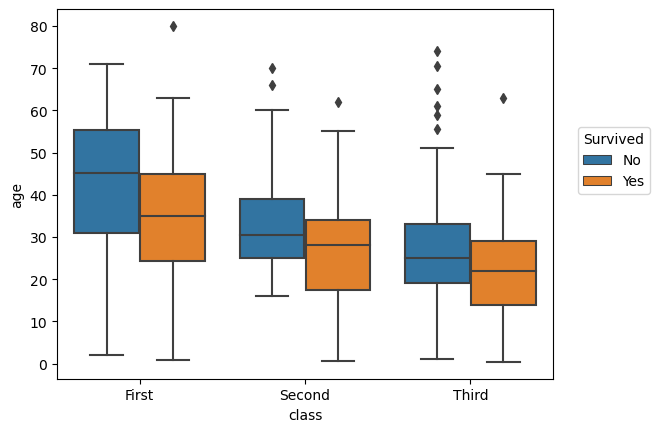

In [124]:
# Based on this boxplot it seems that in the first class, median age of survivors was a lot less than compared to other classes
# Also, it seems that age goes up as the 
sns.boxplot(data=df, y='age',x='class', hue='survived_text')
plt.legend(loc=(1.05,0.5),title='Survived')
plt.show()